In [2]:
import pandas as pd

# Load the dataset
df = pd.read_excel("/content/bert_features_output.xlsx")

# Display the column names
print(df.columns.tolist())

['text_', 'label', 'bert_feat_0', 'bert_feat_1', 'bert_feat_2', 'bert_feat_3', 'bert_feat_4', 'bert_feat_5', 'bert_feat_6', 'bert_feat_7', 'bert_feat_8', 'bert_feat_9', 'bert_feat_10', 'bert_feat_11', 'bert_feat_12', 'bert_feat_13', 'bert_feat_14', 'bert_feat_15', 'bert_feat_16', 'bert_feat_17', 'bert_feat_18', 'bert_feat_19', 'bert_feat_20', 'bert_feat_21', 'bert_feat_22', 'bert_feat_23', 'bert_feat_24', 'bert_feat_25', 'bert_feat_26', 'bert_feat_27', 'bert_feat_28', 'bert_feat_29', 'bert_feat_30', 'bert_feat_31', 'bert_feat_32', 'bert_feat_33', 'bert_feat_34', 'bert_feat_35', 'bert_feat_36', 'bert_feat_37', 'bert_feat_38', 'bert_feat_39', 'bert_feat_40', 'bert_feat_41', 'bert_feat_42', 'bert_feat_43', 'bert_feat_44', 'bert_feat_45', 'bert_feat_46', 'bert_feat_47', 'bert_feat_48', 'bert_feat_49', 'bert_feat_50', 'bert_feat_51', 'bert_feat_52', 'bert_feat_53', 'bert_feat_54', 'bert_feat_55', 'bert_feat_56', 'bert_feat_57', 'bert_feat_58', 'bert_feat_59', 'bert_feat_60', 'bert_feat_61',

PCA Apply to Bert

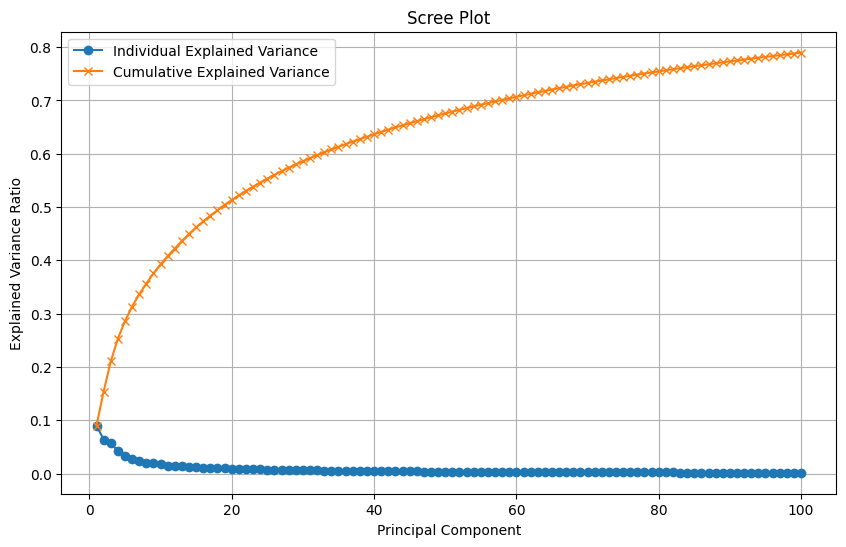

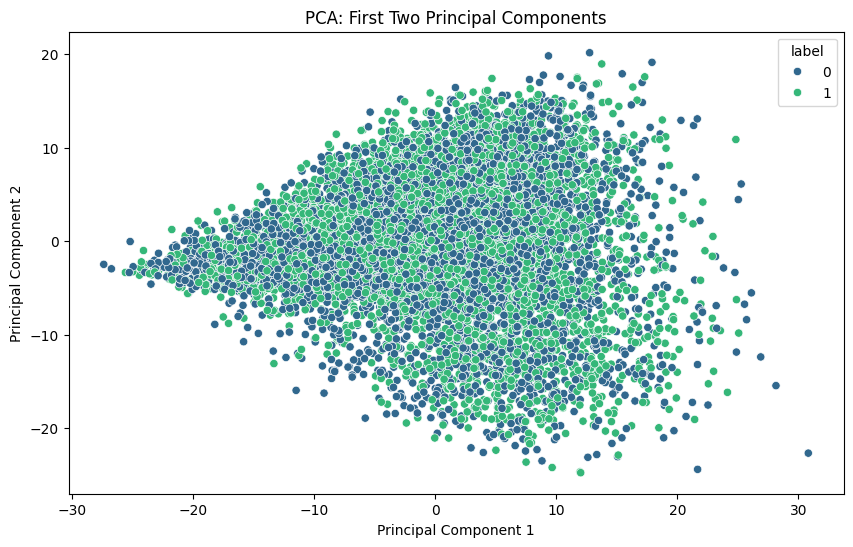

In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("/content/bert_features_output.xlsx")

# Separate features and labels
X = df.drop(columns=['text_'])
y = df['label']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_scaled)

# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), explained_variance, marker='o', label='Individual Explained Variance')
plt.plot(range(1, 101), cumulative_variance, marker='x', label='Cumulative Explained Variance')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.legend()
plt.grid(True)
plt.savefig("scree_plot_full_dataset.png")
plt.show()

# 2D Scatter Plot of First Two Components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title("PCA: First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.savefig("pca_scatter_full_dataset.png")
plt.show()

# Save PCA-transformed data
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(100)])
pca_df['label'] = y.values
pca_df.to_excel("bert_pca_output.xlsx", index=False)

# Save explained variance
pd.DataFrame({
    'Component': range(1, 101),
    'Explained Variance Ratio': explained_variance,
    'Cumulative Variance Ratio': cumulative_variance
}).to_csv("pca_variance_full.csv", index=False)

ML Models

KNN

=== KNN ===
Train Accuracy: 0.8224
Test Accuracy: 0.6960

Train Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      4502
           1       0.86      0.77      0.81      4498

    accuracy                           0.82      9000
   macro avg       0.83      0.82      0.82      9000
weighted avg       0.83      0.82      0.82      9000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.80      0.72       500
           1       0.74      0.60      0.66       500

    accuracy                           0.70      1000
   macro avg       0.70      0.70      0.69      1000
weighted avg       0.70      0.70      0.69      1000



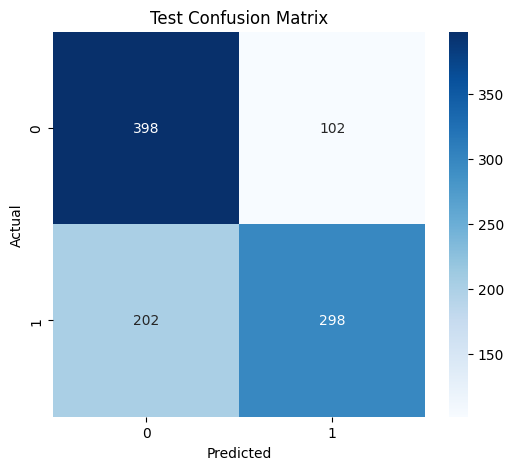

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the PCA-transformed dataset
df_pca = pd.read_excel("/content/bert_pca_output.xlsx")

# Separate features and labels
X = df_pca.drop(columns=['label'])
y = df_pca['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=42, stratify=y)

# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # you can tune k as needed
knn.fit(X_train, y_train)

# Predict on train and test
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("=== KNN ===")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Classification Reports
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("knn_confusion_matrix.png")
plt.show()

XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:13:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== XGBoost ===
Train Accuracy: 1.0000
Test Accuracy: 0.8270

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4502
           1       1.00      1.00      1.00      4498

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       500
           1       0.82      0.84      0.83       500

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



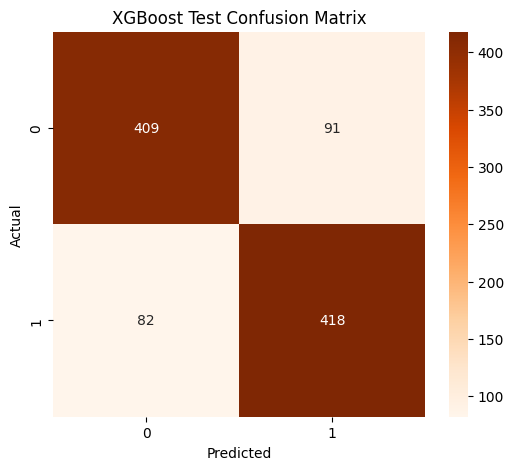

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Load the PCA-transformed dataset
df_pca = pd.read_excel("/content/bert_pca_output.xlsx")

# Separate features and labels
X = df_pca.drop(columns=['label'])
y = df_pca['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=42, stratify=y)

# Initialize and train XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict on train and test
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("=== XGBoost ===")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Classification Reports
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("XGBoost Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("xgb_confusion_matrix.png")
plt.show()

XGBoot Hyperparameter Turning

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:30:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== XGBoost After Tuning ===
Train Accuracy: 0.9998
Test Accuracy: 0.8410

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4502
           1       1.00      1.00      1.00      4498

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       500
           1       0.84      0.84      0.84       500

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



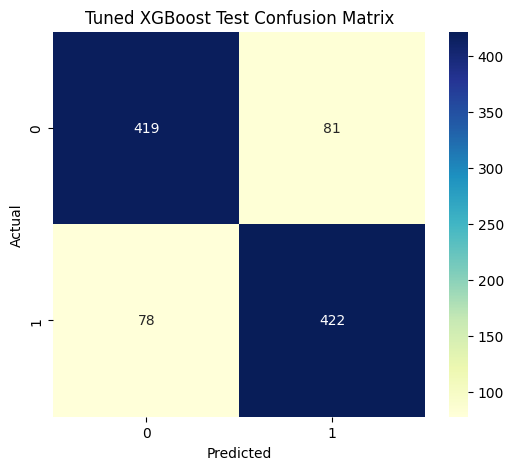


Best Hyperparameters:
{'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load PCA-transformed dataset
df_pca = pd.read_excel("/content/bert_pca_output.xlsx")
X = df_pca.drop(columns=['label'])
y = df_pca['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, stratify=y, random_state=42)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(xgb_clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_xgb = grid_search.best_estimator_

# Evaluation
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("=== XGBoost After Tuning ===")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Tuned XGBoost Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("tuned_xgb_confusion_matrix.png")
plt.show()

# Show best hyperparameters
print("\nBest Hyperparameters:")
print(grid_search.best_params_)

Random Forest

=== Random Forest ===
Train Accuracy: 1.0000
Test Accuracy: 0.8080

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4502
           1       1.00      1.00      1.00      4498

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       500
           1       0.81      0.81      0.81       500

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



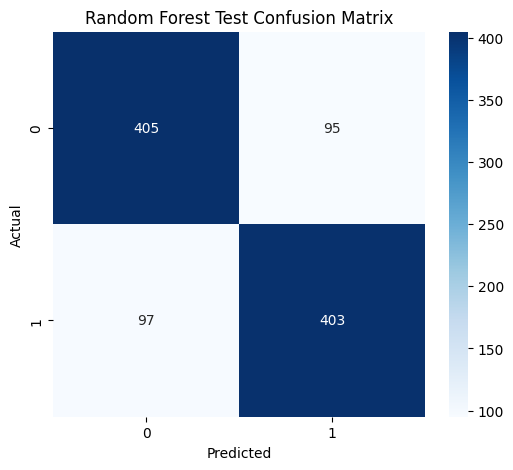

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("/content/bert_pca_output.xlsx")
X = df.drop(columns=['label'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, stratify=y, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("=== Random Forest ===")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Random Forest Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("rf_confusion_matrix.png")
plt.show()

Random Forest Hyperparameter Tuning

Fitting 3 folds for each of 216 candidates, totalling 648 fits
=== Tuned Random Forest ===
Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
Train Accuracy: 0.9931
Test Accuracy: 0.8140

Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4502
           1       0.99      0.99      0.99      4498

    accuracy                           0.99      9000
   macro avg       0.99      0.99      0.99      9000
weighted avg       0.99      0.99      0.99      9000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       500
           1       0.81      0.83      0.82       500

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



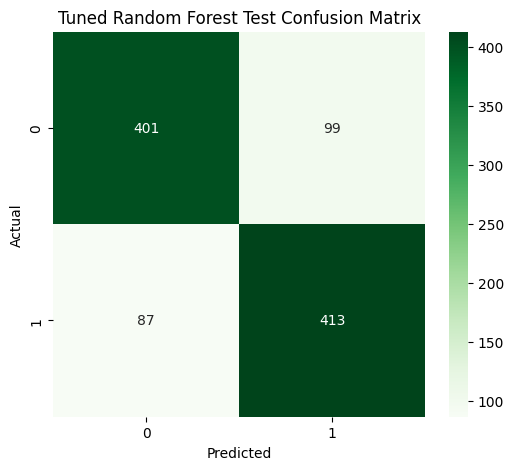

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel("/content/bert_pca_output.xlsx")
X = df.drop(columns=['label'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, stratify=y, random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best estimator
best_rf = grid_search.best_estimator_

# Predictions
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("=== Tuned Random Forest ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Tuned Random Forest Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("rf_tuned_confusion_matrix.png")
plt.show()

Decision Tree

=== Decision Tree ===
Train Accuracy: 1.0000
Test Accuracy: 0.6360

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4502
           1       1.00      1.00      1.00      4498

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       500
           1       0.63      0.65      0.64       500

    accuracy                           0.64      1000
   macro avg       0.64      0.64      0.64      1000
weighted avg       0.64      0.64      0.64      1000



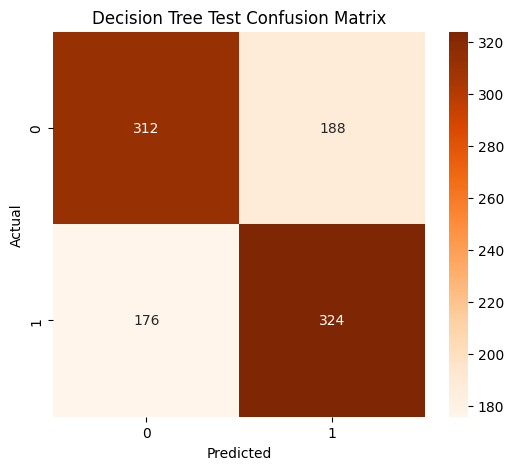

In [14]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the PCA dataset
df = pd.read_excel("/content/bert_pca_output.xlsx")

# Split into features and labels
X = df.drop(columns=['label'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, stratify=y, random_state=42)

# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("=== Decision Tree ===")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Classification reports
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Decision Tree Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("decision_tree_confusion_matrix.png")
plt.show()

Decision Tree Hyperparameter Tuning

Fitting 5 folds for each of 72 candidates, totalling 360 fits
=== Tuned Decision Tree ===
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train Accuracy: 0.6836
Test Accuracy: 0.6230

Train Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.80      0.72      4502
           1       0.74      0.57      0.64      4498

    accuracy                           0.68      9000
   macro avg       0.69      0.68      0.68      9000
weighted avg       0.69      0.68      0.68      9000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.76      0.67       500
           1       0.67      0.49      0.56       500

    accuracy                           0.62      1000
   macro avg       0.63      0.62      0.62      1000
weighted avg       0.63      0.62      0.62      1000



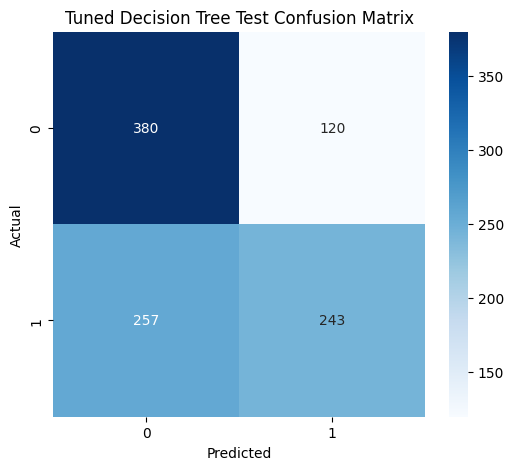

In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("/content/bert_pca_output.xlsx")
X = df.drop(columns=['label'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, stratify=y, random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV for tuning
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_dt = grid_search.best_estimator_

# Predictions
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("=== Tuned Decision Tree ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Classification reports
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Tuned Decision Tree Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("tuned_decision_tree_confusion_matrix.png")
plt.show()

MLP Classifier

=== MLP Classifier ===
Train Accuracy: 1.0000
Test Accuracy: 0.8310

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4502
           1       1.00      1.00      1.00      4498

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       500
           1       0.83      0.83      0.83       500

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



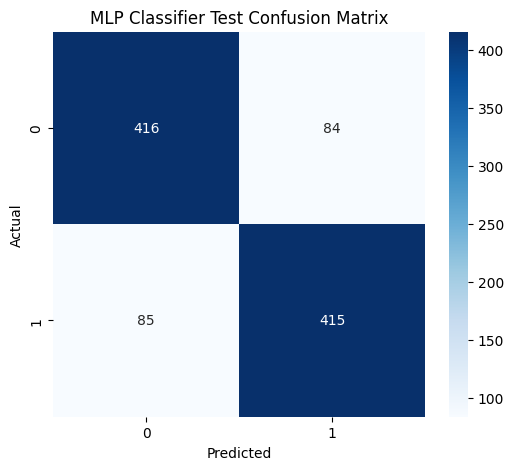

In [16]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("/content/bert_pca_output.xlsx")
X = df.drop(columns=['label'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, stratify=y, random_state=42)

# MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("=== MLP Classifier ===")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Classification reports
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("MLP Classifier Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("mlp_confusion_matrix.png")
plt.show()

MLP Classifier Hyperparameter Tuning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the PCA-transformed dataset
df = pd.read_excel("/content/bert_pca_output.xlsx")
X = df.drop(columns=['label'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, stratify=y, random_state=42)

# Define MLP model
mlp = MLPClassifier(max_iter=500, random_state=42)

# Define hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty (regularization)
    'learning_rate': ['constant', 'adaptive']
}

# GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_mlp = grid_search.best_estimator_
print("Best Parameters:\n", grid_search.best_params_)

# Evaluate best model
y_train_pred = best_mlp.predict(X_train)
y_test_pred = best_mlp.predict(X_test)

print("\n=== MLP Classifier (Tuned) ===")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("MLP Classifier (Tuned) - Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("mlp_tuned_confusion_matrix.png")
plt.show()

SVM

=== SVM (RBF Kernel) ===
Train Accuracy: 0.9400
Test Accuracy: 0.8630

Train Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4502
           1       0.94      0.94      0.94      4498

    accuracy                           0.94      9000
   macro avg       0.94      0.94      0.94      9000
weighted avg       0.94      0.94      0.94      9000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       500
           1       0.86      0.87      0.86       500

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



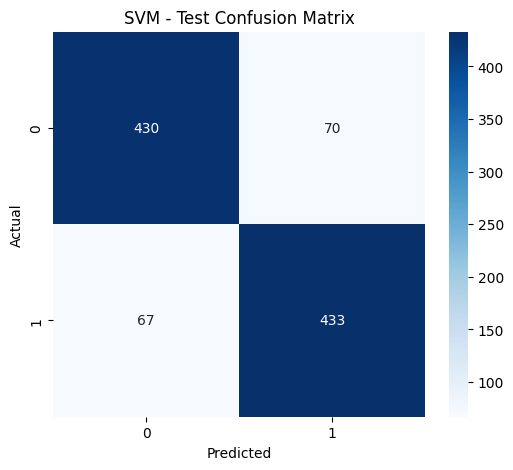

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("/content/bert_pca_output.xlsx")
X = df.drop(columns=['label'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, stratify=y, random_state=42)

# Train SVM with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Evaluation
print("=== SVM (RBF Kernel) ===")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("SVM - Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("svm_confusion_matrix.png")
plt.show()

Naive Bayes Classifier

=== Naive Bayes (GaussianNB) ===
Train Accuracy: 0.8360
Test Accuracy: 0.8380

Train Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      4502
           1       0.85      0.82      0.83      4498

    accuracy                           0.84      9000
   macro avg       0.84      0.84      0.84      9000
weighted avg       0.84      0.84      0.84      9000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       500
           1       0.84      0.84      0.84       500

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



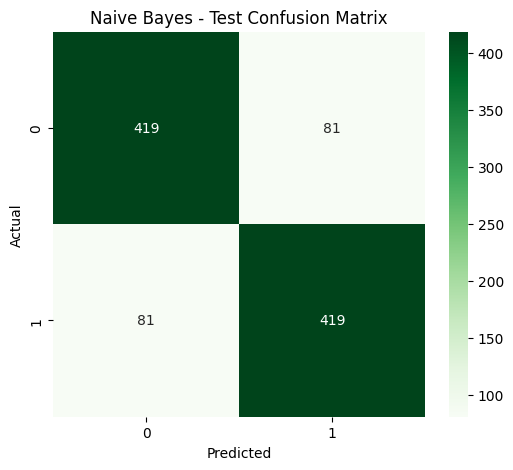

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load PCA-transformed dataset
df = pd.read_excel("/content/bert_pca_output.xlsx")
X = df.drop(columns=['label'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, stratify=y, random_state=42)

# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

# Evaluation
print("=== Naive Bayes (GaussianNB) ===")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Naive Bayes - Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("naive_bayes_confusion_matrix.png")
plt.show()

Stacking Classifier

=== Stacking Classifier ===
Train Accuracy: 0.93511
Test Accuracy: 0.869

Train Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4502
           1       0.94      0.93      0.94      4498

    accuracy                           0.94      9000
   macro avg       0.94      0.94      0.94      9000
weighted avg       0.94      0.94      0.94      9000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       500
           1       0.86      0.88      0.87       500

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



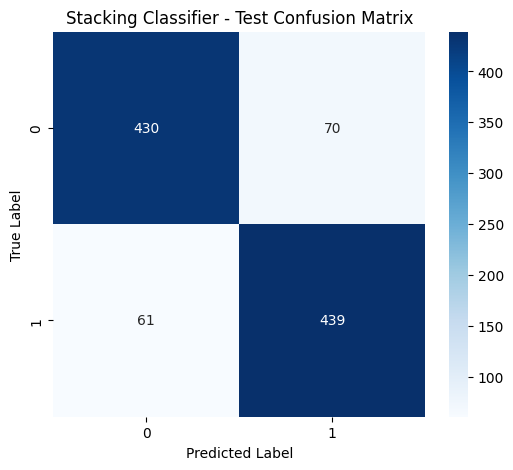

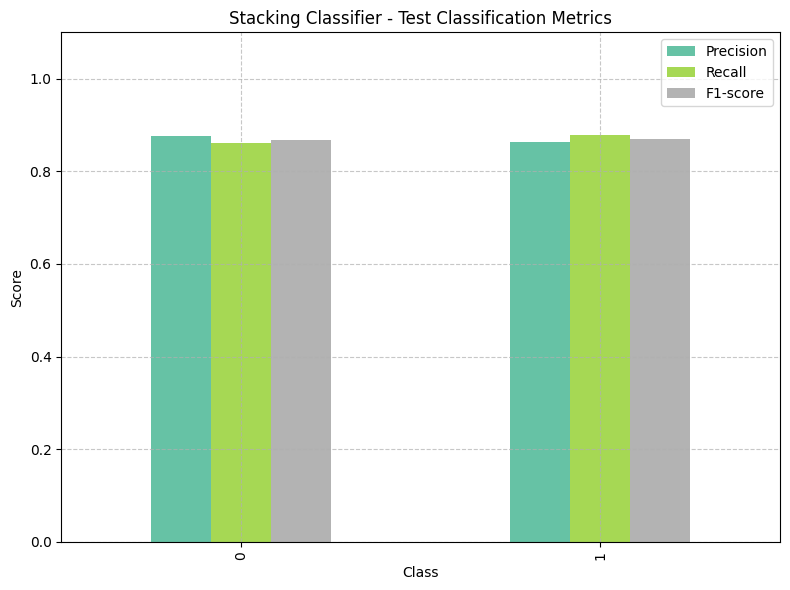

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the PCA dataset
df = pd.read_excel("/content/bert_pca_output.xlsx")
X = df.drop(columns=['label'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, stratify=y, random_state=42)

# Define base learners
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(kernel='rbf', probability=True, random_state=42))
]

# Define stacking classifier
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    passthrough=True
)

# Train model
stack_model.fit(X_train, y_train)

# Predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Metrics
print("=== Stacking Classifier ===")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.5f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.3f}")

print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Stacking Classifier - Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("stacking_confusion_matrix.png")
plt.show()

# Classification Report Bar Graph for Test
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_test_pred, average=None, labels=[0,1])
metrics = pd.DataFrame({
    'Class': ['0', '1'],
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1_score
})

metrics.set_index('Class').plot(kind='bar', figsize=(8, 6), colormap='Set2')
plt.title("Stacking Classifier - Test Classification Metrics")
plt.ylim(0, 1.1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel("Score")
plt.tight_layout()
plt.savefig("stacking_classification_report_graph.png")
plt.show()

Bar Graph

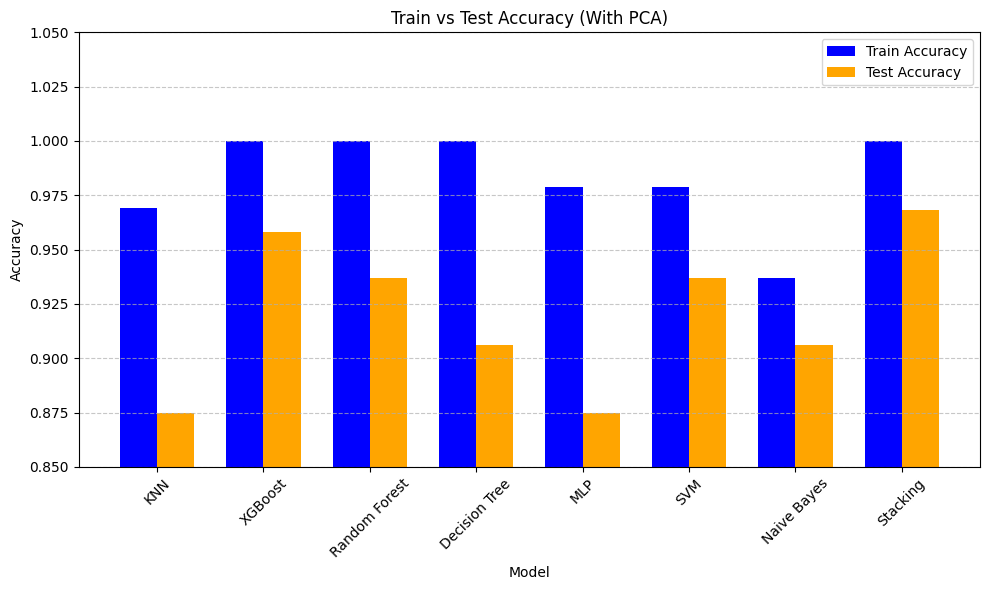

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and accuracy values
models = ['KNN', 'XGBoost', 'Random Forest', 'Decision Tree', 'MLP', 'SVM', 'Naive Bayes', 'Stacking']
train_accuracy = [0.969, 1.000, 1.000, 1.000, 0.979, 0.979, 0.937, 1.000]
test_accuracy = [0.875, 0.958, 0.937, 0.906, 0.875, 0.937, 0.906, 0.968]

# Set the bar width and positions
bar_width = 0.35
index = np.arange(len(models))

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(index, train_accuracy, bar_width, label='Train Accuracy', color='blue')
plt.bar(index + bar_width, test_accuracy, bar_width, label='Test Accuracy', color='orange')

# Customize the plot
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy (With PCA)')
plt.xticks(index + bar_width / 2, models, rotation=45)
plt.legend()
plt.ylim(0.85, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save and show the plot
plt.savefig("/content/train_test_accuracy_with_pca.png")
plt.show()